<a href="https://colab.research.google.com/github/ArunK-ML/ML-Regression-Model---Melbourne-Housing-----Dataset/blob/main/ML_Model_Melbourne_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/melb_data.csv")
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
df.isna().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


# **Handling Null Value**

In [5]:
df_clean = df.copy()

In [6]:
# === 1. BUILDING AREA ===
# Estimate using Build-to-Land ratio grouped by Suburb and Type
df_clean['BuildLandRatio'] = df_clean['BuildingArea'] / df_clean['Landsize']
ratio_lookup = df_clean.groupby(['Suburb', 'Type'])['BuildLandRatio'].median()

def estimate_building_area(row):
    if pd.isnull(row['BuildingArea']) and row['Landsize'] > 0:
        ratio = ratio_lookup.get((row['Suburb'], row['Type']), np.nan)
        if pd.notnull(ratio):
            return row['Landsize'] * ratio
    return row['BuildingArea']

df_clean['BuildingArea'] = df_clean.apply(estimate_building_area, axis=1)

# Fill remaining with median based on Type
df_clean['BuildingArea'] = df_clean['BuildingArea'].fillna(
    df_clean.groupby('Type')['BuildingArea'].transform('median')
)
df_clean['BuildingArea'] = df_clean['BuildingArea'].fillna(df_clean['BuildingArea'].median())


In [7]:
# === 2. YEAR BUILT ===
def infer_year(row):
    if pd.isnull(row['YearBuilt']):
        sale_year = int(row['Date'].split('/')[-1])
        if pd.notnull(row['BuildingArea']) and row['BuildingArea'] > 200:
            return sale_year - 10
        elif row['Landsize'] > 800:
            return 1940
        else:
            return 0

    return row['YearBuilt']

df_clean['YearBuilt'] = df_clean.apply(infer_year, axis=1)
df_clean['YearBuilt'] = df_clean['YearBuilt'].fillna(
    df_clean.groupby(['Suburb', 'Type'])['YearBuilt'].transform('median')
)
df_clean['YearBuilt'] = df_clean['YearBuilt'].fillna(df_clean['YearBuilt'].median())


In [8]:
# === 3. CAR SPACES ===
def estimate_car_spaces(row):
    if pd.isnull(row['Car']):
        if row['Landsize'] > 400:
            return 2
        elif row['Landsize'] > 150:
            return 1
        else:
            return 0
    return row['Car']

df_clean['Car'] = df_clean.apply(estimate_car_spaces, axis=1)


In [9]:
# === 4. COUNCIL AREA ===
postcode_to_council = (
    df_clean.dropna(subset=['CouncilArea'])
    .groupby('Postcode')['CouncilArea']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

df_clean['CouncilArea'] = df_clean.apply(
    lambda x: postcode_to_council.get(x['Postcode'], x['CouncilArea']) if pd.isnull(x['CouncilArea']) else x['CouncilArea'],
    axis=1
)

In [10]:
df_clean.isna().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [11]:
# Fallback: fill remaining CouncilArea with global mode
df_clean['CouncilArea'] = df_clean['CouncilArea'].fillna(df_clean['CouncilArea'].mode().iloc[0])

# === CLEANUP ===
df_clean.drop(columns=['BuildLandRatio'], inplace=True)

In [12]:
df_clean.isna().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [13]:
df = df_clean.copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [15]:
# Date conversion
df["Date"]=pd.to_datetime(df["Date"],format="%d/%m/%Y")

In [16]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['Week'] = df['Date'].dt.isocalendar().week

In [17]:
df.drop("Date",axis=1,inplace=True)

In [18]:
# Count Duplicate entry

df.duplicated().sum()

np.int64(0)

In [19]:
df.to_csv("melb_Clean_Data")

# **Encoder**

In [20]:
from sklearn.preprocessing import LabelEncoder
code = LabelEncoder()

for i in df.select_dtypes(include="object").columns:
  df[i] = code.fit_transform(df[i])

In [21]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,Day,Weekday,Week
0,0,12794,2,0,1480000.0,1,23,2.5,3067.0,2.0,...,31,-37.79960,144.99840,2,4019.0,2016,12,3,5,48
1,0,5943,2,0,1035000.0,1,23,2.5,3067.0,2.0,...,31,-37.80790,144.99340,2,4019.0,2016,2,4,3,5
2,0,9814,3,0,1465000.0,3,23,2.5,3067.0,3.0,...,31,-37.80930,144.99440,2,4019.0,2017,3,4,5,9
3,0,9004,3,0,850000.0,0,23,2.5,3067.0,3.0,...,31,-37.79690,144.99690,2,4019.0,2017,3,4,5,9
4,0,10589,4,0,1600000.0,4,155,2.5,3067.0,3.0,...,31,-37.80720,144.99410,2,4019.0,2016,6,4,5,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,302,1991,4,0,1245000.0,1,16,16.7,3150.0,4.0,...,20,-37.90562,145.16761,4,7392.0,2017,8,26,5,34
13576,305,12234,3,0,1031000.0,3,251,6.8,3016.0,3.0,...,10,-37.85927,144.87904,6,6380.0,2017,8,26,5,34
13577,305,12745,3,0,1170000.0,1,194,6.8,3016.0,3.0,...,10,-37.85274,144.88738,6,6380.0,2017,8,26,5,34
13578,305,13311,4,0,2500000.0,0,222,6.8,3016.0,4.0,...,10,-37.85908,144.89299,6,6380.0,2017,8,26,5,34


# **Correlation testing**

In [22]:
df.corr()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,Day,Weekday,Week
Suburb,1.000000,0.027335,-0.060510,0.018195,-0.135830,0.016421,0.023240,-0.039550,-0.057947,-0.059578,...,0.048999,0.137892,-0.140629,-0.010919,0.142738,0.011599,0.001276,-0.004749,-0.015720,0.000991
Address,0.027335,1.000000,0.020016,-0.069483,0.049186,0.003562,-0.000806,-0.034019,0.001943,0.015854,...,0.009843,-0.010896,-0.004079,0.005517,0.016331,-0.001251,-0.011845,-0.011306,0.002305,-0.013278
Rooms,-0.060510,0.020016,1.000000,-0.554141,0.496634,-0.051368,-0.031054,0.294203,0.055303,0.944190,...,-0.145774,0.015948,0.100771,-0.028661,-0.081530,0.092227,0.033908,0.011150,0.044622,0.035509
Type,0.018195,-0.069483,-0.554141,1.000000,-0.414566,0.078432,0.034045,-0.234845,0.027420,-0.533994,...,0.086699,-0.105827,0.007094,0.065048,0.082663,-0.082052,-0.039876,-0.015429,-0.043665,-0.042127
Price,-0.135830,0.049186,0.496634,-0.414566,1.000000,-0.037741,-0.052109,-0.162522,0.107867,0.475951,...,-0.116108,-0.212934,0.203656,0.079109,-0.042153,0.003993,0.027969,-0.011228,0.038679,0.026866
Method,0.016421,0.003562,-0.051368,0.078432,-0.037741,1.000000,-0.005728,-0.052316,-0.016321,-0.049553,...,0.022874,-0.000157,-0.036409,0.016837,-0.034055,0.011158,-0.002314,-0.000688,0.002146,-0.002465
SellerG,0.023240,-0.000806,-0.031054,0.034045,-0.052109,-0.005728,1.000000,0.007584,0.007928,-0.030165,...,0.020866,-0.032291,-0.043861,0.028686,0.060338,0.010547,-0.004124,-0.005867,0.017997,-0.005183
Distance,-0.039550,-0.034019,0.294203,-0.234845,-0.162522,-0.052316,0.007584,1.000000,0.431514,0.295927,...,-0.210404,-0.130723,0.239425,-0.096808,-0.054910,0.249599,0.028909,0.018178,0.054772,0.031741
Postcode,-0.057947,0.001943,0.055303,0.027420,0.107867,-0.016321,0.007928,0.431514,1.000000,0.060584,...,-0.039918,-0.406104,0.445357,-0.010656,0.062304,0.101151,0.019328,-0.001706,0.033430,0.019393
Bedroom2,-0.059578,0.015854,0.944190,-0.533994,0.475951,-0.049553,-0.030165,0.295927,0.060584,1.000000,...,-0.139231,0.015925,0.102238,-0.034797,-0.081350,0.113348,0.036784,0.010979,0.041992,0.038588


In [23]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Year', 'Month', 'Day', 'Weekday',
       'Week'],
      dtype='object')

In [24]:
df['PropertyAge'] = df["Year"] - df['YearBuilt']

In [25]:
df.drop(["YearBuilt"],axis=1,inplace=True)

In [26]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount', 'Year', 'Month', 'Day', 'Weekday', 'Week',
       'PropertyAge'],
      dtype='object')

# **Hypothesis testing**

In [27]:
catergory = ['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG',
             'Postcode', 'Bedroom2', 'Bathroom', 'Car','PropertyAge',
             'CouncilArea','Regionname', 'Propertycount', 'Month',
             'Day', 'Weekday','Week']

continous = ['Price','Distance', 'Landsize','BuildingArea','Year', 'Lattitude', 'Longtitude']

In [28]:
from scipy import stats

#continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.1:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False

In [29]:
#cat vs cat
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.1 else False

In [30]:
#continious(d1) vs cat(d2)
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        # Check if the category has more than one data point
        if len(df[d1][df[d2]==i]) > 1:
            data[i]=df[d1][df[d2]==i]
    # Check if there are at least two groups with more than one data point
    if len(data) < 2:
        return False  # Cannot perform ANOVA with less than two groups
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.1 else True

In [31]:
final = {}
for i in df.columns:
    final[i]={}
    for j in df.columns:
        if (i in continous) and (j in continous):
            result=two_sample(df[i],df[j])
        elif (i in continous) and (j in catergory):
            result=annova_test(i,j)
        elif (i in catergory) and (j in continous):
            result=annova_test(j,i)
        elif (i in catergory) and (j in catergory):
            result=chisquare_cat_vs_cat(df[i],df[j])
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:3974: RuntimeWarning: invalid value encountered in subtract
  alldata = alldata - offset
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:3982: RuntimeWarning: invalid value encountered in subtract
  smo_ss = _square_of_sums(sample - offset, axis=axis)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:3974: RuntimeWarning: invalid value encountered in subtract
  alldata = alldata - offset
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:3982: RuntimeWarning: invalid value encountered in subtract
  smo_ss = _square_of_sums(sample - offset, axis=axis)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:3974: RuntimeWarning: invalid value encountered in subtract
  alldata = alldata - offset
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:3982: RuntimeWarning: invalid value encountered in subtract
  smo_ss = _square_of_sums(sample - offset, axis=axis

In [32]:
final_df = pd.DataFrame(final)
final_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,Day,Weekday,Week,PropertyAge
Suburb,1,1,1,1,0,1,1,0,1,1,...,0,0,1,1,0,1,1,0,1,1
Address,1,1,0,1,0,0,1,0,1,1,...,0,0,1,1,0,0,0,0,0,1
Rooms,1,0,1,1,0,1,1,0,1,1,...,0,0,1,1,0,1,1,1,1,1
Type,1,1,1,1,0,1,1,0,1,1,...,0,1,1,1,0,1,1,1,1,1
Price,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Method,1,0,1,1,0,1,1,0,1,1,...,0,0,1,1,0,1,1,1,1,1
SellerG,1,1,1,1,0,1,1,0,1,1,...,0,0,1,1,0,1,1,1,1,0
Distance,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Postcode,1,1,1,1,0,1,1,0,1,1,...,0,0,1,1,0,1,1,0,1,1
Bedroom2,1,1,1,1,0,1,1,0,1,1,...,0,0,1,1,0,1,1,0,1,1


<Axes: >

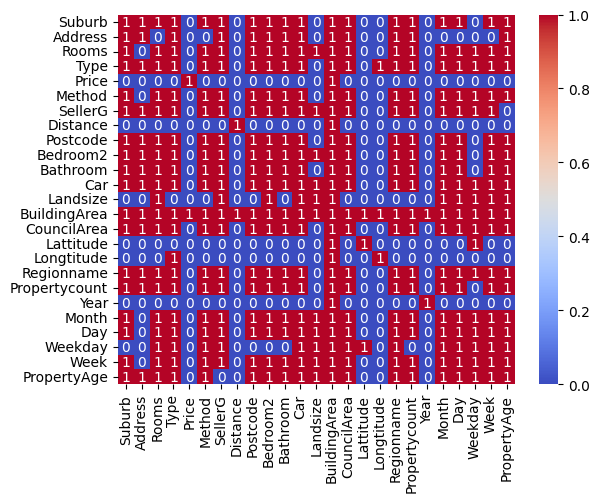

In [33]:
import seaborn as sns
sns.heatmap(final_df,annot=True,cmap="coolwarm")

# **Skewness, Kurtosis**

In [34]:
from scipy.stats import boxcox

a = 0
for i in continous:
  if df[i].skew() < 0.5 and df[i].skew() > -0.5 and df[i].kurtosis() < 3 and df[i].kurtosis() > -3:
    continue
  print(i)
  a +=1
  method = [0,0.5,-0.5,-1,1,2,-2]
  for j in method:
    print(j)
    print("skewness",pd.DataFrame(boxcox(df[i],lmbda=j)).skew().values,"Kurtosis",pd.DataFrame(boxcox(df[i],lmbda=j)).kurtosis().values)
  print("---------------------------------")
print(a)

Price
0
skewness [0.18065989] Kurtosis [0.00620539]
0.5
skewness [1.02890873] Kurtosis [1.8857639]
-0.5
skewness [-0.61657206] Kurtosis [0.89629267]
-1
skewness [0.] Kurtosis [8.80765468]
1
skewness [2.23962431] Kurtosis [9.87433889]
2
skewness [8.61841317] Kurtosis [155.31218847]
-2
skewness [0.] Kurtosis [0.]
---------------------------------
Distance
0
skewness [nan] Kurtosis [nan]
0.5
skewness [0.44995328] Kurtosis [1.02301298]
-0.5
skewness [nan] Kurtosis [nan]
-1
skewness [nan] Kurtosis [nan]
1
skewness [1.67693708] Kurtosis [5.26000111]
2
skewness [4.64757417] Kurtosis [30.26152994]
-2
skewness [nan] Kurtosis [nan]
---------------------------------
Landsize
0
skewness [nan] Kurtosis [nan]
0.5
skewness [10.29916897] Kurtosis [384.29247491]
-0.5
skewness [nan] Kurtosis [nan]
-1
skewness [nan] Kurtosis [nan]
1
skewness [95.23740045] Kurtosis [10180.34682775]
2
skewness [116.13283924] Kurtosis [13516.7511359]
-2
skewness [nan] Kurtosis [nan]
---------------------------------
Buildin

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1344: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


In [35]:
df['Price']=boxcox(df['Price'],lmbda=-0.5)
df['Distance']=boxcox(df['Distance'],lmbda=0.5)
df['Landsize']=boxcox(df['Landsize'],lmbda=0.5)

# **Train the model ML**

In [36]:
df.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount', 'Year', 'Month', 'Day', 'Weekday', 'Week',
       'PropertyAge'],
      dtype='object')

In [37]:
y = df['Price']
x = df.drop("Price",axis=1)


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10185, 24), (3395, 24), (10185,), (3395,))

In [39]:
# Step 1
# Check for infinite values in x_train
print(x_train.columns[np.isinf(x_train).any()])

Index(['BuildingArea'], dtype='object')


In [40]:
# Step 2 for replacing inf values ,replaced the values by mean()
x_train.replace([np.inf,-np.inf],np.nan,inplace=True)
x_test.replace([np.inf,-np.inf],np.nan,inplace=True)
x_train.fillna(x_train.mean(),inplace=True)
x_test.fillna(x_test.mean(),inplace=True)

In [41]:
# Step 3
# Check for infinite values in x_train
print(x_train.columns[np.isinf(x_train).any()])

Index([], dtype='object')


In [43]:
# Step 4
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

model = RandomForestRegressor().fit(x_train,y_train)
y_pred = model.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.0001539337507450291
7.705424737262233e-05
4.591399240633552e-08
0.8571953787667712


In [44]:
# Model 1
from sklearn.svm import SVR
model1 = SVR().fit(x_train,y_train)
y_pred = model1.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.0016204802409265063
0.0008110316274862636
2.9377158895382913e-06
-8.137070921292072


In [45]:
# Model 2
from sklearn.neighbors import KNeighborsRegressor
model2 = KNeighborsRegressor(n_neighbors=3)
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.00038755675331538685
0.00019399906210361138
2.619324563328264e-07
0.18532100444967892
